# Prediction Macau 2022

In [56]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D

In [57]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [58]:
import pandas as pd

In [59]:
macau = pd.read_csv('Datasets/Macau-2022.csv', index_col='date', parse_dates = ['date'])
macau = macau.fillna(method="ffill")
macau.head()

,arrival
date,
2011-01-01,2076066
2011-02-01,2164249
2011-03-01,2190865
2011-04-01,2338449
2011-05-01,2295551


In [60]:
mc_values = macau.values

In [61]:
n_steps = 4

In [62]:
X, y = split_sequence(mc_values, n_steps)

In [63]:
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [64]:
#CNN-LSTM model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [65]:
model.fit(X, y, epochs=50, verbose=0)

In [66]:
#MAPE Calculation for Feb 2022
x_input = array([328245, 801300, 820870, 694430])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Predicted Value Feb 2022: ", yhat)
feb = 655505
print("Actual Value Feb 2022: ", feb)
MAPE = abs(feb - yhat)/feb
print("MAPE: %.2f" %(MAPE))

Predicted Value Feb 2022:  762815
Actual Value Feb 2022:  655505
MAPE: 0.16


In [67]:
#Prediction for March 2022
x_input = array([801300, 820870, 694430, 655505])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for March 2022", yhat)
march = 526912
print("Actual Value March 2022: ", march)
MAPE = abs(march - yhat)/march
print("MAPE: %.2f" %(MAPE))

Prediction for March 2022 720790
Actual Value March 2022:  526912
MAPE: 0.37


In [68]:
#Prediction for April 2022
x_input = array([820870, 694430, 655505, 526912])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for April 2022", yhat)

Prediction for April 2022 704672


In [69]:
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [70]:
#ConvLSTM model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [71]:
model.fit(X, y, epochs=50, verbose=0)

In [72]:
#MAPE Calculation for Feb 2022
x_input = array([328245, 801300, 820870, 694430])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Predicted Value Feb 2022: ", yhat)
feb = 655505
print("Actual Value Feb 2022: ", feb)
MAPE = abs(feb - yhat)/feb
print("MAPE: %.2f" %(MAPE))

Predicted Value Feb 2022:  647520
Actual Value Feb 2022:  655505
MAPE: 0.01


In [73]:
#Prediction for March 2022
x_input = array([801300, 820870, 694430, 655505])
x_input = x_input.reshape((1, n_seq,1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for March 2022", yhat)
march = 526912
print("Actual Value March 2022: ", march)
MAPE = abs(march - yhat)/march
print("MAPE: %.2f" %(MAPE))

Prediction for March 2022 671174
Actual Value March 2022:  526912
MAPE: 0.27


In [74]:
#Prediction for April 2022
x_input = array([820870, 694430, 655505, 526912])
x_input = x_input.reshape((1, n_seq,1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for April 2022", yhat)

Prediction for April 2022 655770


# Analysis and Error calculation for train and test data 

In [75]:
train_size = int(len(mc_values)*0.87)
test_size = len(mc_values) - train_size
train, test = mc_values[0:train_size, :], mc_values[train_size:len(mc_values), :]
print(len(train), len(test))

116 18


In [76]:
X_train, Y_train = split_sequence(train, 4)
X_test, Y_test = split_sequence(test, 4)

In [77]:
X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0],n_seq,n_steps,n_features))

In [78]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [79]:
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [80]:
yhat_train = model.predict(X_train,verbose=0)

In [81]:
yhat_test = model.predict(X_test,verbose=0)

In [82]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [83]:
train_score = math.sqrt(mean_squared_error(Y_train, yhat_train[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 426164.93 RMSE


In [84]:
test_score = math.sqrt(mean_squared_error(Y_test, yhat_test[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 197834.51 RMSE


In [85]:
train_mape = mean_absolute_percentage_error(Y_train, yhat_train[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.60 MAPE


In [86]:
test_mape = mean_absolute_percentage_error(Y_test, yhat_test[:, 0])
print('Test score: %.2f MAPE' %(test_mape))

Test score: 0.32 MAPE


In [87]:
mc_predicted = np.array(mc_values,dtype='f')

In [88]:
trainPredictPlot = np.empty_like(mc_predicted)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[4:len(yhat_train)+4, :] = yhat_train

In [89]:
testPredictPlot = np.empty_like(mc_predicted)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(4*2):len(mc_predicted), :] = yhat_test

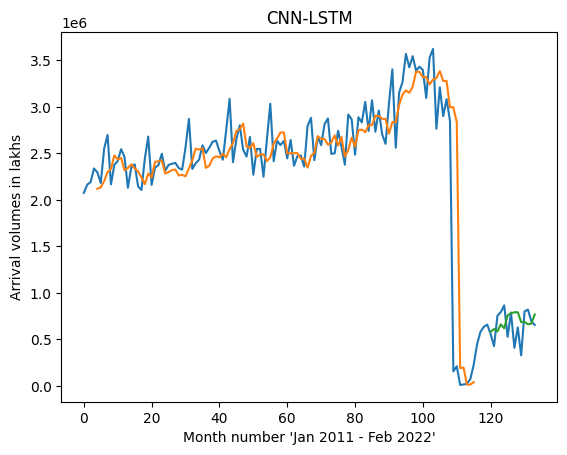

In [90]:
plt.plot(mc_values)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("Month number 'Jan 2011 - Feb 2022'")
plt.ylabel("Arrival volumes in lakhs")
plt.title("CNN-LSTM")
plt.show()

In [91]:
X_train = X_train.reshape((X_train.shape[0], n_seq, 1, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0],n_seq, 1, n_steps, n_features))

In [92]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [93]:
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [94]:
yhat_train = model.predict(X_train,verbose=0)

In [95]:
yhat_test = model.predict(X_test,verbose=0)

In [96]:
train_score = math.sqrt(mean_squared_error(Y_train, yhat_train[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 371507.19 RMSE


In [97]:
test_score = math.sqrt(mean_squared_error(Y_test, yhat_test[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 213846.83 RMSE


In [98]:
train_mape = mean_absolute_percentage_error(Y_train, yhat_train[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.36 MAPE


In [99]:
test_mape = mean_absolute_percentage_error(Y_test, yhat_test[:, 0])
print('Test score: %.2f MAPE' %(test_mape))

Test score: 0.32 MAPE


In [100]:
mc_predicted = np.array(mc_values,dtype='f')

In [101]:
trainPredictPlot = np.empty_like(mc_predicted)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[4:len(yhat_train)+4, :] = yhat_train

In [102]:
testPredictPlot = np.empty_like(mc_predicted)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(4*2):len(mc_predicted), :] = yhat_test

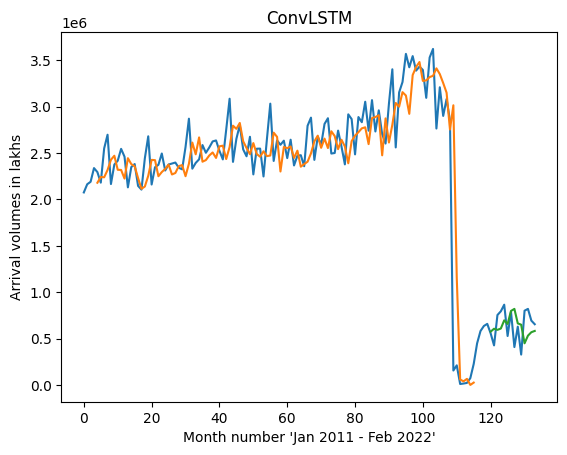

In [103]:
plt.plot(mc_values)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("ConvLSTM")
plt.xlabel("Month number 'Jan 2011 - Feb 2022'")
plt.ylabel("Arrival volumes in lakhs")
plt.show()